In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import nba_py as nba
from nba_py import player
from IPython.display import IFrame

In [2]:
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=202691&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=&PlayerPosition=&CFID='
print(shot_chart_url)

import json

from pprint import pprint

with open('shotchartdetail.json') as data_file:    
    data = json.load(data_file)

http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=202691&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=&PlayerPosition=&CFID=


In [3]:
headers = data['resultSets'][0]['headers']
shots = data['resultSets'][0]['rowSet']

shot_df = pd.DataFrame(shots, columns=headers)
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,56,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,12,31,1,1,20151027,GSW,NOP
1,Shot Chart Detail,0021500003,9,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,29,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-176,195,1,0,20151027,GSW,NOP
2,Shot Chart Detail,0021500003,14,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,9,1,0,20151027,GSW,NOP
3,Shot Chart Detail,0021500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,13,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-197,193,1,1,20151027,GSW,NOP
4,Shot Chart Detail,0021500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-4,8,1,1,20151027,GSW,NOP


In [5]:
def streakiness(data):
    ones = np.zeros(len(data))
    zeros = np.zeros(len(data))
    state = data[0]
    streak = 1
    for d in data[1:]:
        if d!=state:
            if state == 1:
                ones[streak-1]+=1
            else:
                zeros[streak-1]+=1
            streak = 1
            state = d
        else:
            streak+=1
    return ones,zeros

In [8]:
shots_made=shot_df[shot_df['EVENT_TYPE']=='Made Shot']
shots_missed=shot_df[shot_df['EVENT_TYPE']=='Missed Shot']
print(shots_made.shape)
print(shots_missed.shape)
shots_made = shots_made[shots_made.LOC_Y < 420]
shots_missed = shots_missed[shots_missed.LOC_Y < 420]

(805, 24)
(793, 24)


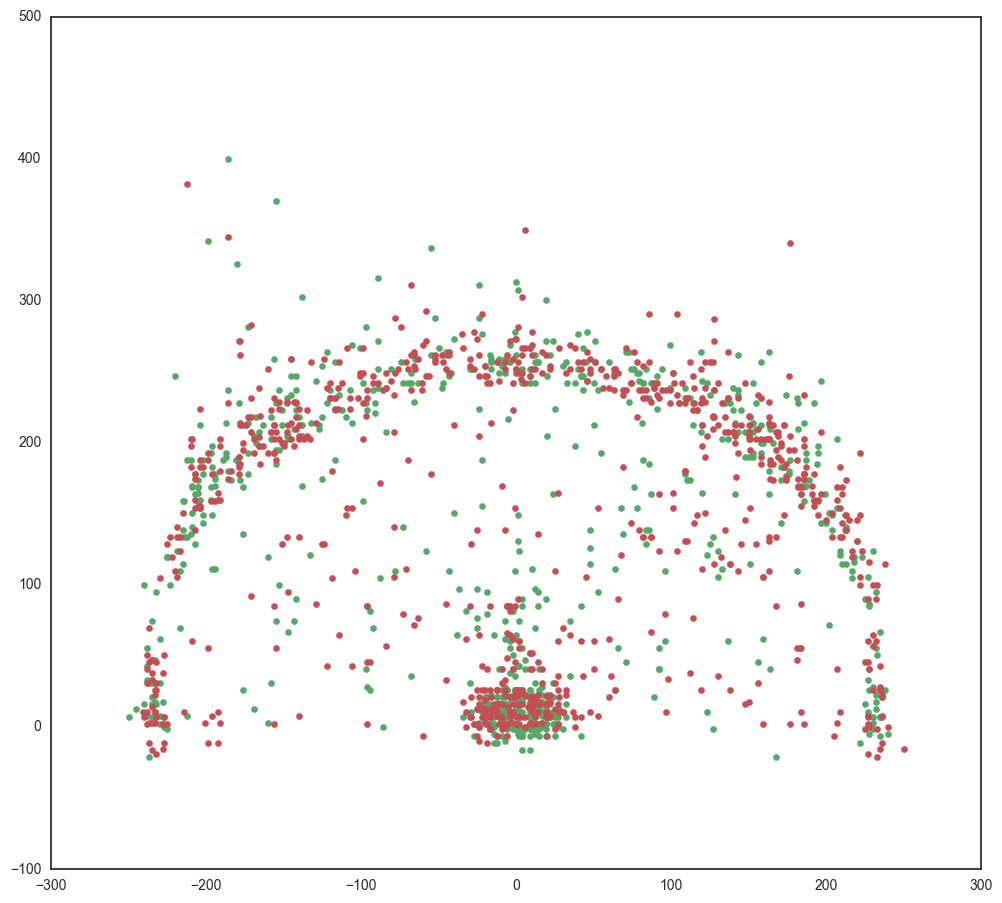

In [9]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shots_made.LOC_X, shots_made.LOC_Y,color="g")
plt.scatter(shots_missed.LOC_X, shots_missed.LOC_Y,color="r")
plt.show()

In [10]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

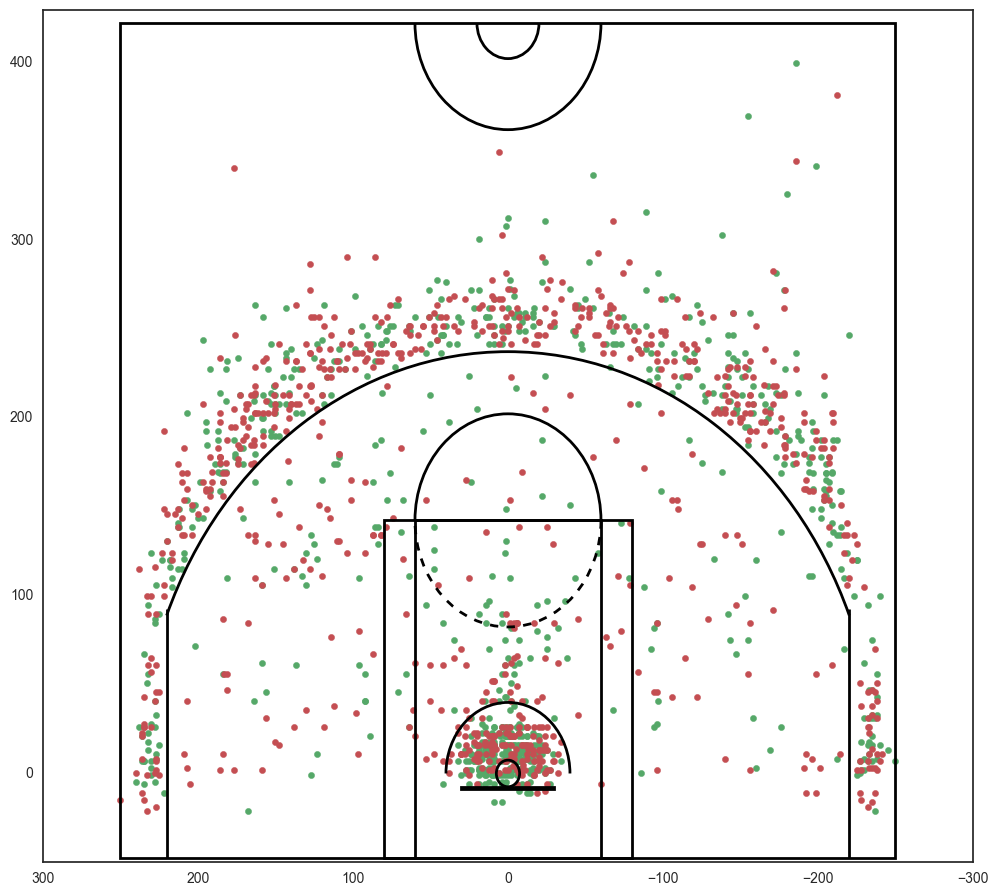

In [11]:
plt.figure(figsize=(12,11))
plt.scatter(shots_made.LOC_X, shots_made.LOC_Y,color="g")
plt.scatter(shots_missed.LOC_X, shots_missed.LOC_Y,color="r")
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-50,430)
plt.show()

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


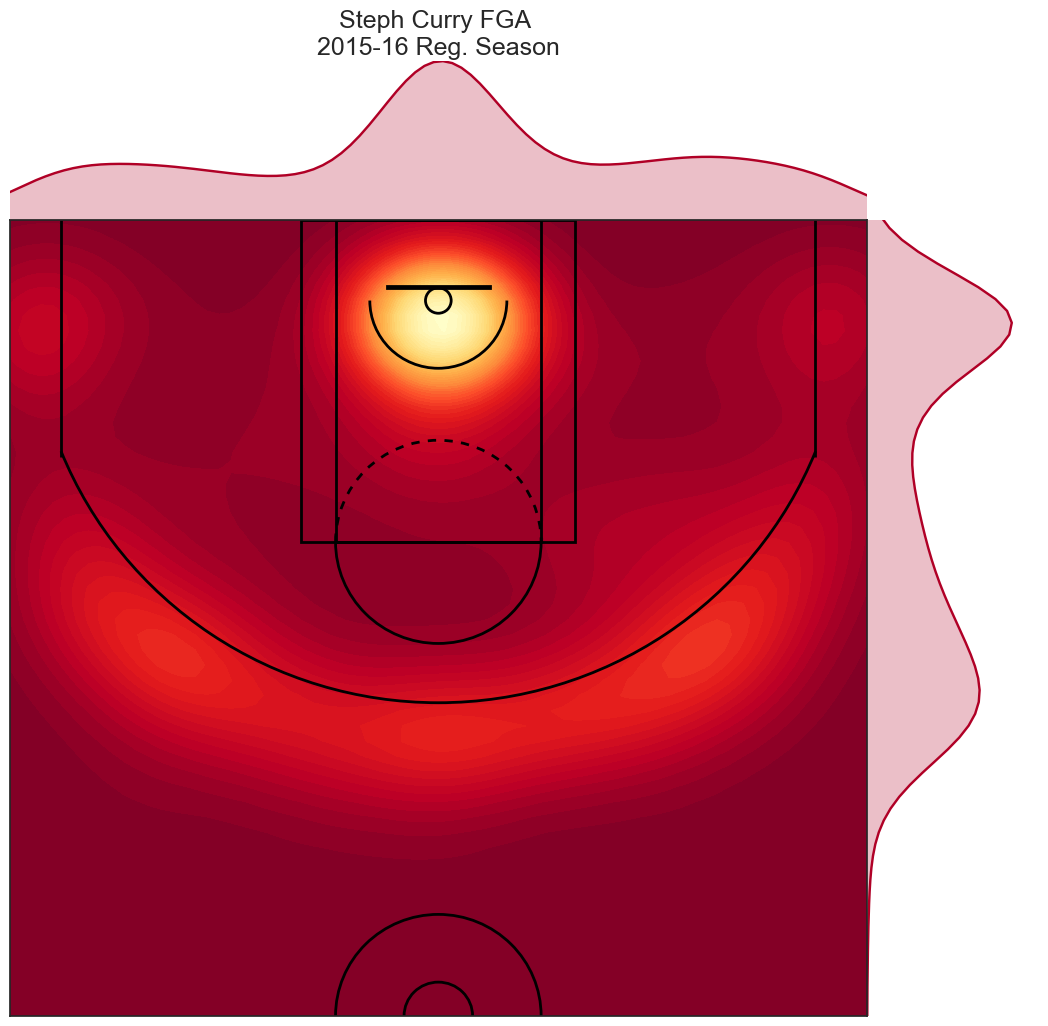

In [12]:
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Steph Curry FGA \n2016-17 Reg. Season', 
             y=1.2, fontsize=18)



In [13]:
# for analysis we need to convert the shot dataframe into shot vs game time
# first I would like to split the data into games since we are given the game time
# in terms of (period,minutes_remaining, seconds_remaining)
game_pivot = shot_df.pivot_table(index=["GAME_ID","GAME_EVENT_ID"],
                                 values=["LOC_X","LOC_Y","PERIOD","MINUTES_REMAINING","SECONDS_REMAINING","SHOT_MADE_FLAG","SHOT_DISTANCE"])
display(game_pivot)

shots_made = np.array(game_pivot["SHOT_MADE_FLAG"])
print("Shots made %: ",shots_made.mean())

LOC_X  LOC_Y  MINUTES_REMAINING  PERIOD  \
GAME_ID    GAME_EVENT_ID                                            
0021500003 6                 12     31                 10       1   
           9               -176    195                 10       1   
           14                20      9                  9       1   
           19              -197    193                  9       1   
           36                -4      8                  7       1   
           38               -11    259                  6       1   
           46              -117    188                  5       1   
           55              -179    228                  5       1   
           68                89    239                  3       1   
           82              -156    232                  3       1   
           88               -19     21                  2       1   
           116               12     18                  0       1   
           127             -186    345                  0       1   
           208              164    185                  6       2   
           221              -96     85                  4       2   
           253              166    174                  2       2   
           261              204    151                  1       2   
           277               -9      8                  0       2   
           302               10     11                 10       3   
           333               -7     13                  7       3   
           339               42     61                  7       3   
           364              161    203                  5       3   
           366               20     23                  5       3   
           395              184    170                  3       3   
           524             -122     43                  5       4   
           550                6      7                  2       4   
0021500030 11              -109    154                 11       1   
           35               209    124                  9       1   
           39               228     87                  8       1   
           44               -52    288                  7       1   
...                         ...    ...                ...     ...   
0021501201 360              -12     -6                  2       3   
           376              168    134                  1       3   
           466              125    129                  5       4   
           481             -165    219                  3       4   
           493               17     11                  2       4   
           497               27      0                  1       4   
0021501227 26              -178    213                  9       1   
           30               123    242                  9       1   
           40                82    242                  7       1   
           77                 0    313                  4       1   
           80               -89    252                  4       1   
           83              -142    237                  3       1   
           90               -22    291                  3       1   
           108              171    183                  0       1   
           114              -68    311                  0       1   
           225              -25    273                  3       2   
           228               84    252                  2       2   
           251                0     21                  0       2   
           258               86    291                  0       2   
           260              181    188                  0       2   
           268              233     51                 11       3   
           273               10     23                 10       3   
           281                1    308                  9       3   
           283               -2     82                  9       3   
           303              240      0                  6       3   
           322          

Shots made %:  0.503754693367


In [14]:
p = shots_made.mean()
t_ones = [p**i*(1-p)**2 for i in range(1,15)]

[ 197.  111.   55.   21.   11.    5.    3.    1.    1.    0.    0.    0.
    1.    0.    0.]
[ 0.99375087  1.11151459  1.093291    0.82865408  0.86164339  0.77747382
  0.92601478  0.61274187  1.2163497   0.        ]


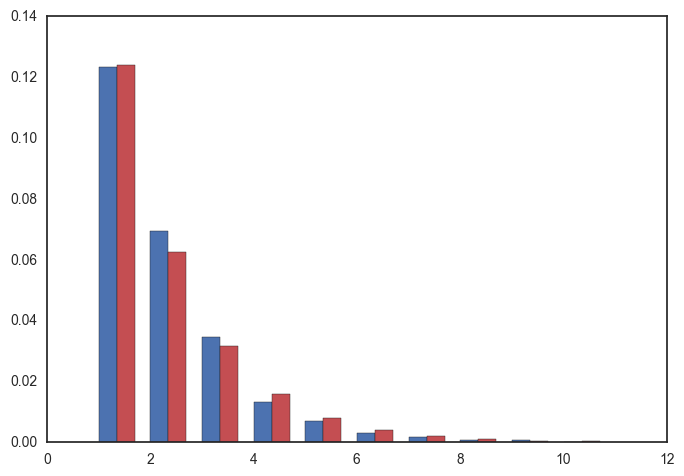

In [15]:
ones,zeros = streakiness(shots_made)
length = shots_made.size
ones_n = ones/length
zeros_n = zeros/length
x = np.arange(1,ones.size+1)
width = 0.35
plt.bar(x[:10],ones_n[:10],width,color="b")
plt.bar(x[:10]+width,t_ones[:10],width,color="r")
print(ones[:15])
print(ones_n[:10]/t_ones[:10])